In [2]:
# Import libraries and functions:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Import our own implementations
import importlib, gradient_descent, OLS, prepare_data, polynomial_features, Ridge
importlib.reload(gradient_descent)
importlib.reload(OLS)
importlib.reload(prepare_data)
importlib.reload(polynomial_features)
importlib.reload(Ridge)

from prepare_data import prepare_data
from polynomial_features import polynomial_features
from gradient_descent import gradient_descent_OLS, gradient_descent_Ridge
from OLS import OLS_parameters
from Ridge import Ridge_parameters

# Styling function
from Set_latex_params import set_mpl_latex_style
set_mpl_latex_style()


## Testing Gradient Descent function, OLS (fixed learning rate)

In [2]:
# Test gradient descent method, OLS:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 6

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = gradient_descent_OLS(X_train_s, y_train, eta=1e-1, num_iters=100000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)
tol=1e-3
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")


GD parameters:  [-0.03070125 -1.39030871  0.11477323  2.328284   -0.08787648 -1.18081412]
Number of iterations: 29152
Closed-form OLS coefficients:  [-0.03069995 -1.39034676  0.11477294  2.32838004 -0.08787759 -1.18087448]
GD parameters equal to closed-form parameters: [ True  True  True  True  True  True].
Tolerance = 0.001


## Calculating parameters with gradient descent, fixed learning rate, OLS

In [3]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Initialize variables, lists:
deg_max = 15
MSE_closed_form = []
MSE_gradient_descent = []
R2_score_closed_form=[]
R2_score_gradient_descent = []
num_iterations = []
eta = 1e-2

# Loop over degrees
for p in range(1, deg_max+1):
    
    # Make feature matrices, scale
    X_plot = polynomial_features(x, p, intercept=False)
    X_train = polynomial_features(x_train, p, intercept=False)
    X_test  = polynomial_features(x_test, p, intercept=False)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s  = scaler.transform(X_test)
    X_plot_s  = scaler.transform(X_plot)
    
    # Compute parameters with gradient descent and analytical solutions
    beta_closed = OLS_parameters(X_train_s, y_train)
    beta_gd, t = gradient_descent_OLS(X_train_s, y_train, eta = eta, num_iters=100000)
    num_iterations.append(t)
    # Compute y_offset
    y_offset = np.mean(y_train)
    # Add to predictions
    y_pred_closed = X_test_s @ beta_closed + y_offset
    y_pred_gd = X_test_s @ beta_gd + y_offset
    
    # Append MSEs
    MSE_closed_form.append(mean_squared_error(y_test, y_pred_closed))
    MSE_gradient_descent.append(mean_squared_error(y_test, y_pred_gd))
    
    # Append R2 scores
    R2_score_closed_form.append(r2_score(y_true=y_test, y_pred = y_pred_closed))
    R2_score_gradient_descent.append(r2_score(y_true=y_test, y_pred = y_pred_gd))



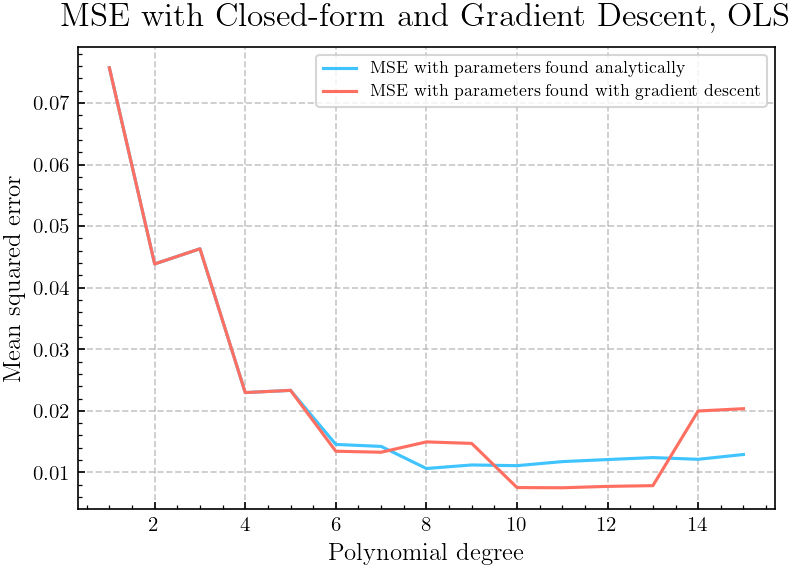

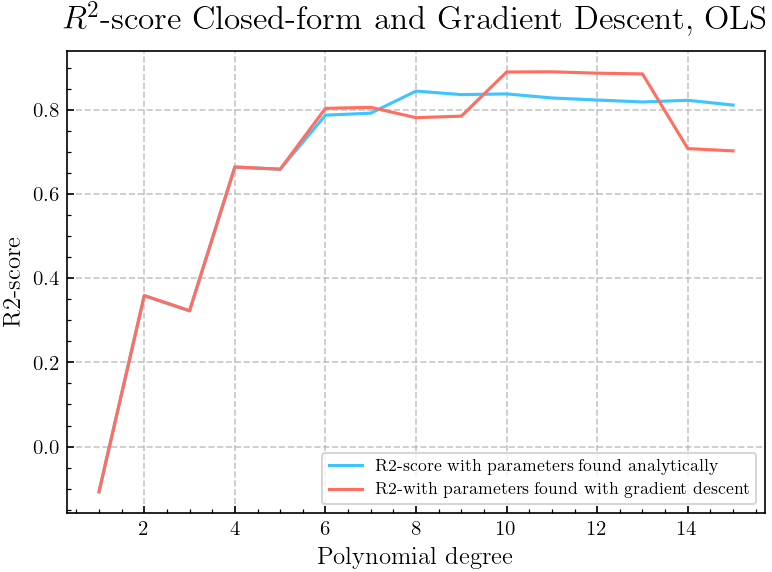

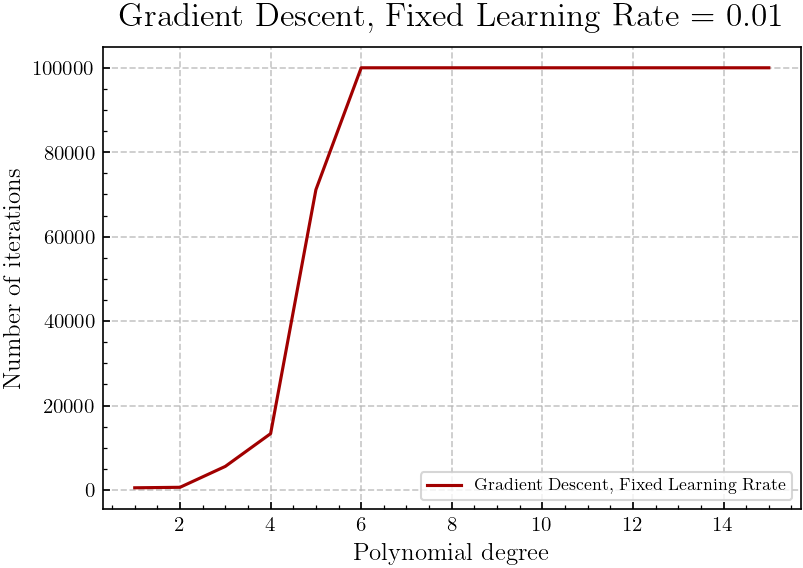

In [5]:
### Plotting results
degrees = np.arange(1, deg_max+1)

plt.figure()
plt.plot(degrees, MSE_closed_form, label="MSE with parameters found analytically", color='#40C4FF', linewidth=1.5)
plt.plot(degrees, MSE_gradient_descent, label="MSE with parameters found with gradient descent", color='#FF6F61', linewidth=1.5)
plt.title("MSE with Closed-form and Gradient Descent, OLS", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Mean squared error", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/mse_closed_form_and_gradient_descent.pdf", bbox_inches="tight")
plt.show()

plt.plot(degrees, R2_score_closed_form, label="R2-score with parameters found analytically", color='#40C4FF', linewidth=1.5)
plt.plot(degrees, R2_score_gradient_descent, label="R2-with parameters found with gradient descent", color='#FF6F61', linewidth=1.5)
plt.title("$R^2$-score Closed-form and Gradient Descent, OLS", fontsize=16, fontfamily='sans-serif', pad=10)
plt.legend(fontsize=8)
plt.ylabel("R2-score", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/r2_closed_form_and_gradient_descent.pdf", bbox_inches="tight")
plt.show()

plt.plot(degrees, num_iterations, label="Gradient Descent, Fixed Learning Rrate", color='#A10000', linewidth=1.5)
plt.title(f"Gradient Descent, Fixed Learning Rate = {eta}", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Number of iterations", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/number_of_iterations_gradient_descent.pdf", bbox_inches="tight")
plt.show()

## Testing gradient descent function (fixed learning rate), Ridge

In [6]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 12
lam = 0.0001
eta = 1e-3

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = gradient_descent_Ridge(X_train_s, y_train, lam = lam, eta=eta, num_iters=100000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = Ridge_parameters(X_train_s, y_train, lam)
print("Closed-form Ridge coefficients: ", beta_closed)
tol=1e-3
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.03464781 -1.76685543  0.16088295  3.77473789 -0.13714943 -2.16339691
 -0.08638804 -1.05970094  0.00842658  0.621827    0.09490854  0.36820604]
Number of iterations: 100000
Closed-form Ridge coefficients:  [ -0.02269922  -2.6241632    0.21613826   9.39523962  -0.60947625
 -13.98227589   0.45432019   6.46169694   0.26234567   3.33947158
  -0.30803259  -2.83664953]
GD parameters equal to closed-form parameters: [False False False False False False False False False False False False].
Tolerance = 0.001


## Calculating parameters with gradient descent, fixed learning rate, Ridge

In [4]:
# Prepare data:
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)
# Set paramters
p = 13
lambdas = np.logspace(-5, 2,20)
# lambdas = [1e-5, 1e-3, 1e-2, 1e-1, 1, 10]
n = len(lambdas)
eta = 1e-3
MSE_closed = []
MSE_gd =[]
R2_score_closed = []
R2_score_gd = []
num_iterations = []

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)

y_offset = np.mean(y_train)

for l in lambdas:
    beta_closed = Ridge_parameters(X_train_s, y_train, l)
    beta_gd, t = gradient_descent_Ridge(X_train_s, y_train, lam=l, eta=eta, num_iters=100000)
    num_iterations.append(t)
    
    y_pred_closed = X_test_s@beta_closed + y_offset
    y_pred_gd = X_test_s @ beta_gd + y_offset
    
    MSE_closed.append(mean_squared_error(y_true=y_test, y_pred=y_pred_closed))
    MSE_gd.append(mean_squared_error(y_true=y_test, y_pred=y_pred_gd))
    
    R2_score_closed.append(r2_score(y_true=y_test, y_pred=y_pred_closed))
    R2_score_gd.append(r2_score(y_true=y_test, y_pred=y_pred_gd))
    # is_close = np.isclose(beta_gd, beta_closed, rtol=tol, atol=tol)
   


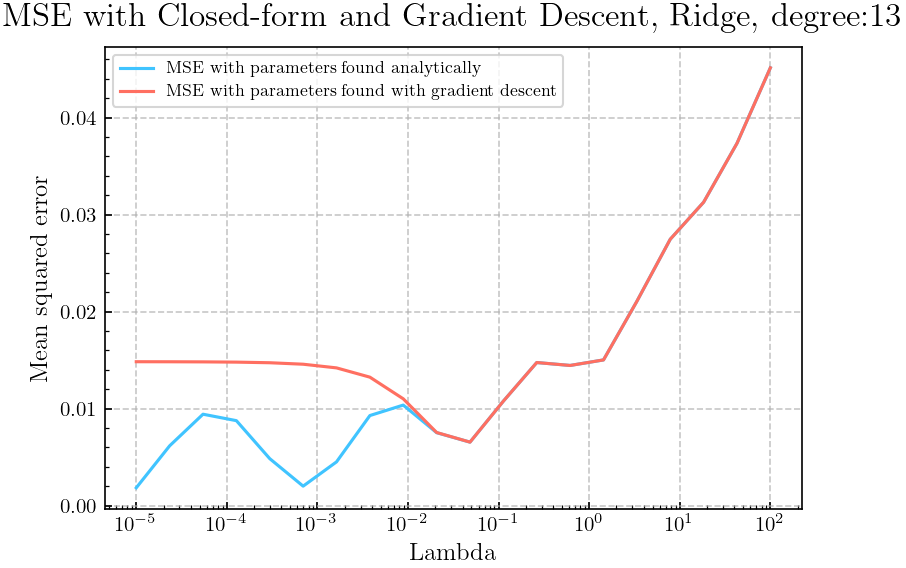

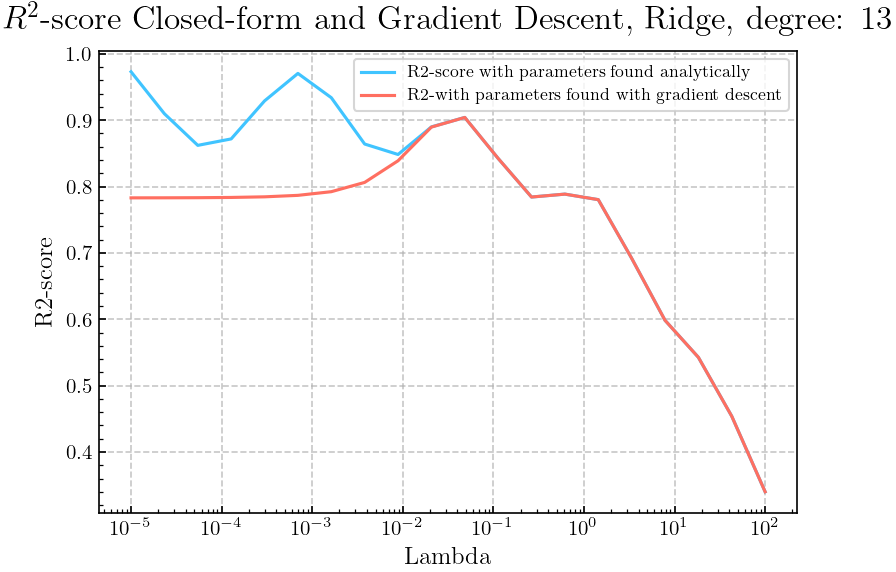

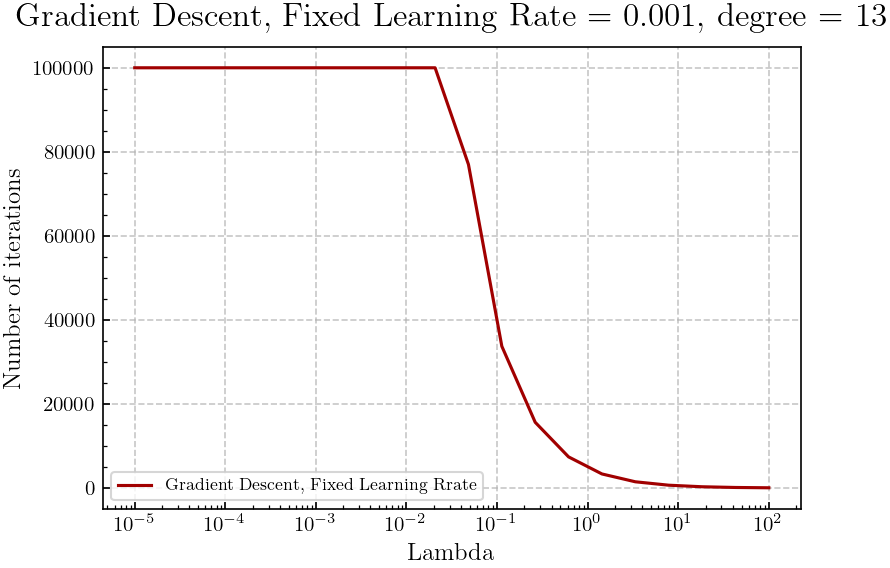

In [5]:
### Plotting results

plt.figure()
plt.plot(lambdas, MSE_closed, label="MSE with parameters found analytically", color='#40C4FF', linewidth=1.5)
plt.plot(lambdas, MSE_gd, label="MSE with parameters found with gradient descent", color='#FF6F61', linewidth=1.5)
plt.title(f"MSE with Closed-form and Gradient Descent, Ridge, degree:{p} ", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Mean squared error", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Lambda", fontsize=12, fontfamily='sans-serif')
plt.xscale("log")
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/mse_closed_form_and_gradient_descent_Ridge.pdf", bbox_inches="tight")
plt.show()

plt.plot(lambdas, R2_score_closed, label="R2-score with parameters found analytically", color='#40C4FF', linewidth=1.5)
plt.plot(lambdas, R2_score_gd, label="R2-with parameters found with gradient descent", color='#FF6F61', linewidth=1.5)
plt.title(rf"$R^2$-score Closed-form and Gradient Descent, Ridge, degree: {p}", fontsize=16, fontfamily='sans-serif', pad=10)
plt.legend(fontsize=8)
plt.ylabel("R2-score", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Lambda", fontsize=12, fontfamily='sans-serif')
plt.xscale("log")
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/r2_closed_form_and_gradient_descent_RIDGE.pdf", bbox_inches="tight")
plt.show()

plt.plot(lambdas, num_iterations, label="Gradient Descent, Fixed Learning Rrate", color='#A10000', linewidth=1.5)
plt.title(f"Gradient Descent, Fixed Learning Rate = {eta}, degree = {p}", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Number of iterations", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Lambda", fontsize=12, fontfamily='sans-serif')
plt.xscale("log")
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/number_of_iterations_gradient_descent_ridge.pdf", bbox_inches="tight")
plt.show()

#### Kommentar:

Gradient descent sliter med komplekse modeller, konvergerer ikke. Men klarer å konvergere med høyere lambda siden den regulerer parameterne og gjør matriseregningen mindre illekondisjonert